# Figure 6

This code can be used to reproduce Figure 6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from dtw_gi import dtw_gi_barycenter_averaging
from utils import plot_trajectory, set_fig_style


set_fig_style()

#opening features
with open("data/RTD Dataset/features", "rb") as fp:
    features = pickle.load(fp)
    features = features.reshape((features.shape[0], -1, 2))
    features[features == 0.] = np.nan
    features[:, :, 1] *= -1.
    features -= np.nanmin(features)
    features /= np.nanmax(features)
 
#opening labels
with open("data/RTD Dataset/labels", "rb") as fp:
    labels = pickle.load(fp)

In [2]:
print(features.shape)
print(labels.shape)

(20000, 150, 2)
(20000, 10)


In [3]:
def process_axis(axis):
    axis.set_xticks([])
    axis.set_yticks([])
    for pos in ['right', 'top', 'bottom', 'left']:
        axis.spines[pos].set_visible(False)
    axis.set_aspect('equal')

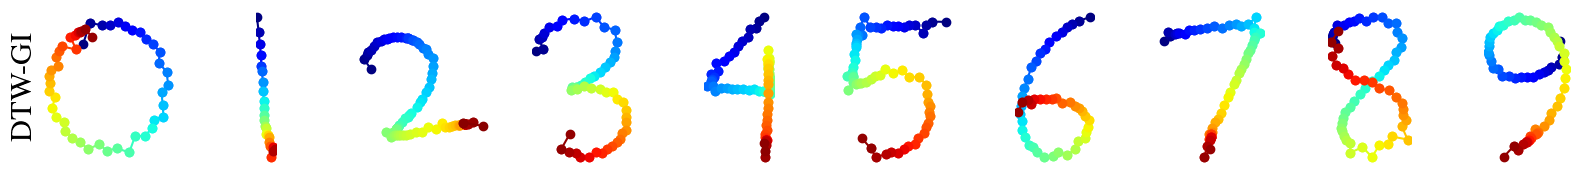

In [4]:
np.random.seed(0)
fig = plt.figure(figsize=(20, 2))
for i in range(10):
    subset = features[labels[:, i] == 1]
    subset = subset[np.random.choice(len(subset), size=50, replace=False)]
    bary_sz = subset.shape[1] // 2

    bar, _ = dtw_gi_barycenter_averaging(subset, n_init=3, barycenter_size=bary_sz,
                                         verbose=False, max_iter=100)
    plt.subplot(1, 10, i + 1)
    ax = plt.gca()
    plot_trajectory(bar, ax)
    process_axis(ax)
    if i == 0:
        ax.set_ylabel("DTW-GI")